<a href="https://colab.research.google.com/github/tabaahi07/Machine-Learning/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


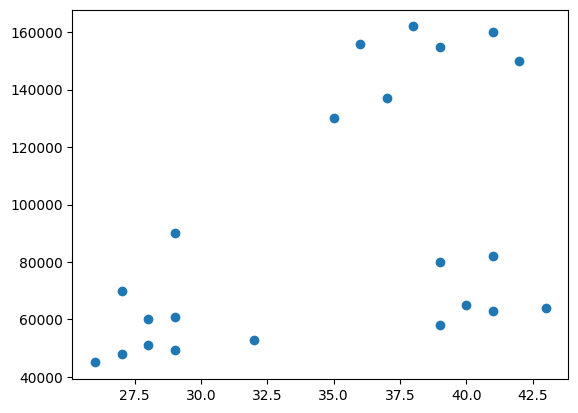

In [3]:
plt.scatter(df['Age'] , df['Income($)'])

In [10]:
# Form clusters -- As we can see here are 3 different cluters or groups
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [11]:
df['cluster(Group)'] = y_predicted
df.head()

,Name,Age,Income($),cluster(Group)
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


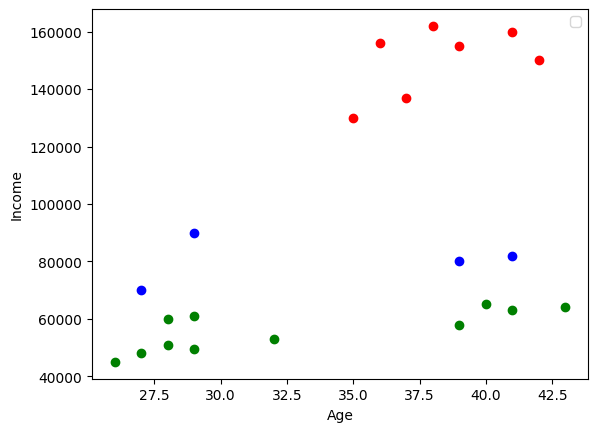

In [17]:
# Spillting dataframe for g=0 , g=1 , g=2
df1 = df[df['cluster(Group)'] == 0]
df2 = df[df['cluster(Group)'] == 1]
df3 = df[df['cluster(Group)'] == 2]

plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue')
plt.ylabel('Income')
plt.xlabel('Age')
plt.legend()

# Here you'll see there is not perfect grouping btw g-2 , g-3

In [24]:
# Hence we'll use MinMax scaler for scaling x and y
# it'll set the range btw 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster(Group)
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [25]:
# Again train the model with k-means
km2 = KMeans(n_clusters=3)
y_predicted2 = km2.fit_predict(df[['Age' , 'Income($)']])
df['newCluster'] = y_predicted2
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Age,Income($),cluster(Group),newCluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


In [29]:
# Centroid of diff cluster
km2.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

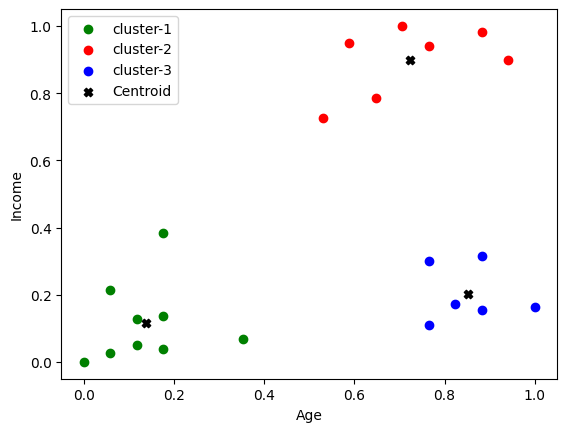

In [34]:
# Spillting dataframe for g=0 , g=1 , g=2
df1 = df[df['newCluster'] == 0]
df2 = df[df['newCluster'] == 1]
df3 = df[df['newCluster'] == 2]

# Plotting
plt.scatter(df1.Age , df1['Income($)'] , color = 'green' , label='cluster-1')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red' , label='cluster-2')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue' , label='cluster-3')
plt.scatter(km2.cluster_centers_[: , 0] , km2.cluster_centers_[: , 1]  , color='black' , marker = 'X' , label='Centroid')
plt.ylabel('Income')
plt.xlabel('Age')
plt.legend()

In [39]:
# Calculate sum of sq errors for different values of k
sse = []
k_rng = range(1,10)
for k in range(1,10) :
  km = KMeans(n_clusters=k)
  km.fit(df[['Age' , 'Income($)']])
  # It calc sse
  sse.append(km.inertia_)

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.2621792762345213,
 0.2105547899547249,
 0.17840674931327927,
 0.13265419827245162,
 0.10188787724979426]

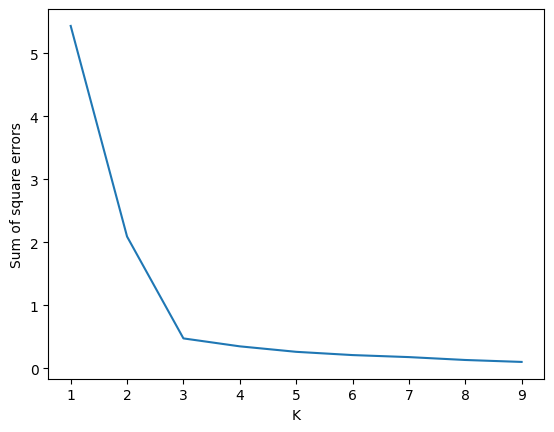

In [41]:
plt.xlabel('K')
plt.ylabel('Sum of square errors')
plt.plot(k_rng,sse)

# Now imagine this graph as a hand , so we can see my elbow is at k=3
# Therefore , k=3 if best for clustering